# DS 3000 - Assignment 7

**Student Name**: David Yu

**Date**: 2/19/25


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: Predicting Meat Consumption (50 pts)
(0 pts) Load the data directly from the URL. Ensure that you inspect the data, so that you know how to identify the necessary columns.
Note: this is an alternate link that can be used to load the data: https://drive.google.com/uc?id=1mEewmIvXA57H3upxkqx9vkZfKch9oDsL

In [1]:
import pandas as pd

df = pd.read_csv('DP_LIVE_26102023160103370.csv')

## Question 2: 
(10 pts) Extract the meat consumption data for any three countries of your choice and evaluate the patterns and trends in their meat consumption. You can explore any (2) types of meat (from the chosen countries), and you should only select one unit of measurement**. Ensure that you visualize the data and explain your findings.


In [5]:
import matplotlib.pyplot as plt

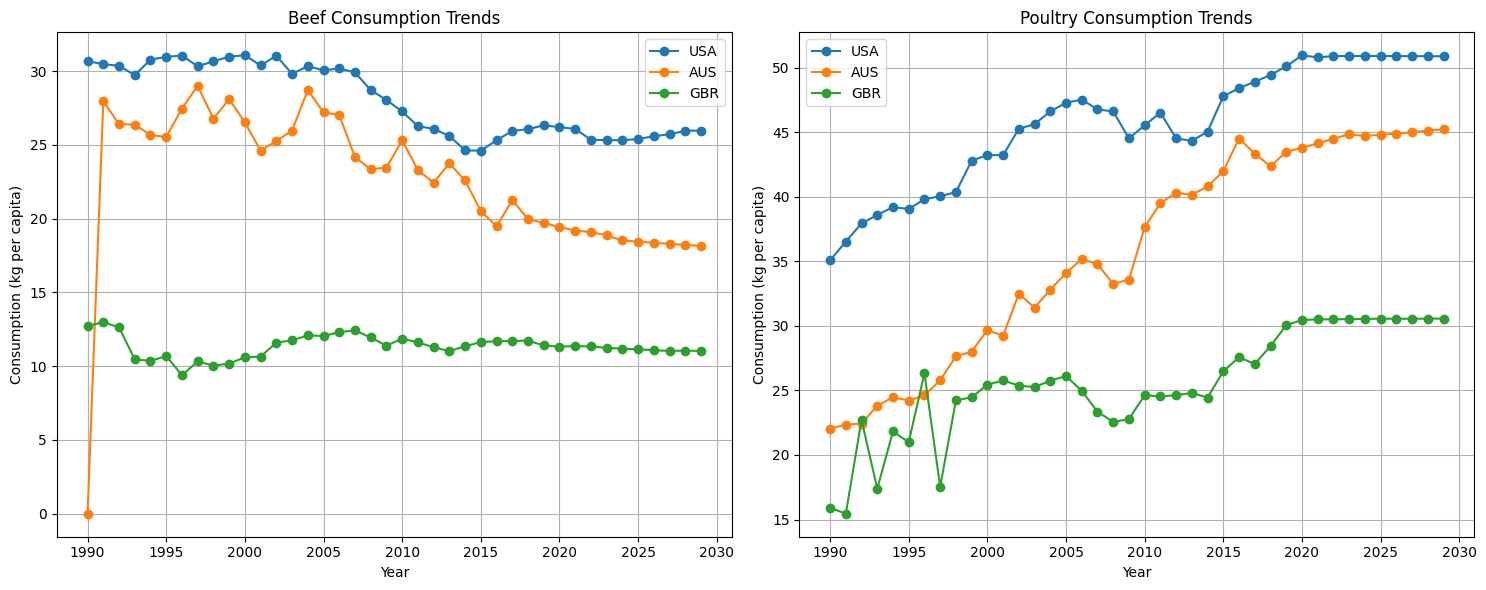

In [6]:
selected_countries = ['USA', 'AUS', 'GBR']
selected_meats = ['BEEF', 'POULTRY']
filtered_df = df[
    (df['LOCATION'].isin(selected_countries)) & 
    (df['SUBJECT'].isin(selected_meats)) &
    (df['MEASURE'] == 'KG_CAP')
]

plt.figure(figsize=(15, 6))

# Beef Plot
plt.subplot(1, 2, 1)
for country in selected_countries:
    beef_data = filtered_df[
        (filtered_df['LOCATION'] == country) & 
        (filtered_df['SUBJECT'] == 'BEEF')
    ]
    plt.plot(beef_data['TIME'], beef_data['Value'], marker='o', label=country)

plt.title('Beef Consumption Trends')
plt.xlabel('Year')
plt.ylabel('Consumption (kg per capita)')
plt.legend()
plt.grid(True)

# Poultry Plot
plt.subplot(1, 2, 2)
for country in selected_countries:
    poultry_data = filtered_df[
        (filtered_df['LOCATION'] == country) & 
        (filtered_df['SUBJECT'] == 'POULTRY')
    ]
    plt.plot(poultry_data['TIME'], poultry_data['Value'], marker='o', label=country)

plt.title('Poultry Consumption Trends')
plt.xlabel('Year')
plt.ylabel('Consumption (kg per capita)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Patterns and Trends Noticed:
- USA has the highest beef consumption, followed by Australia. Great Britain shows significantly less beef consumption compared to the other 2 countries.
- USA and Australia both show a steady decline in beef consumption as time passes. At the same time, poultry consumption increases as time passes for USA and Australia.
- The consumption gaps between all three countries is the smallest for poultry consumption.
- By the time 2030 comes, the graphes seem to show a steady consumption of both poultry and beef.

## Question 3: 
(5 pts) Create a bar chart that shows the frequency of diamonds grouped by cut. Explain the chart.


In [4]:
import matplotlib.pyplot as plt

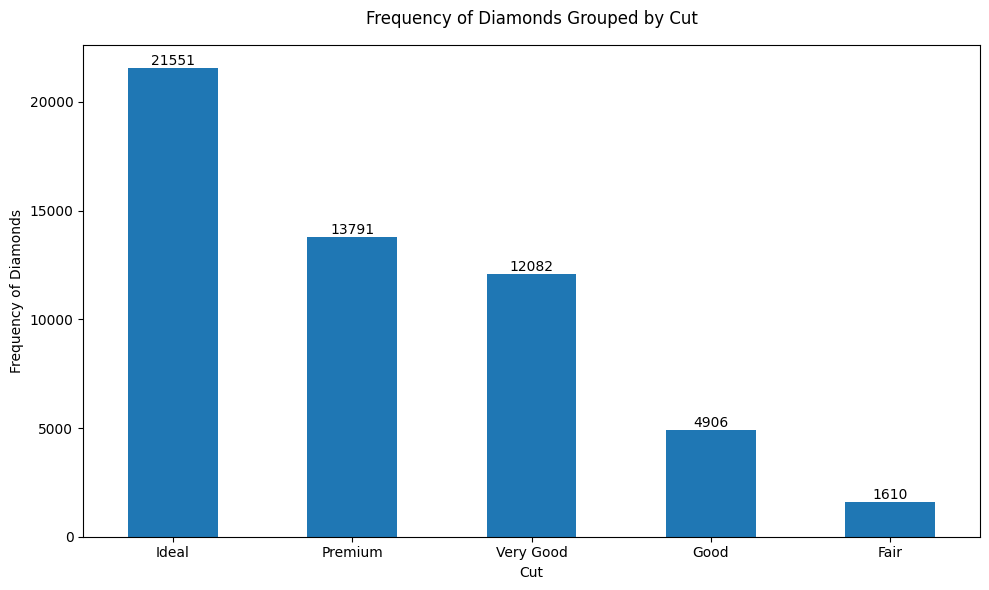

In [5]:
plt.figure(figsize=(10, 6))
df['cut'].value_counts().plot(kind='bar')

# Customize the plot
plt.title('Frequency of Diamonds Grouped by Cut', fontsize=12, pad=15)
plt.xlabel('Cut', fontsize=10)
plt.ylabel('Frequency of Diamonds', fontsize=10)

for i, v in enumerate(df['cut'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xticks(rotation=360)
plt.tight_layout()

plt.show()

This bar chart groups different cuts with the frequency of diamonds. The chart shows that ideal cut diamonds are the most frequent in the dataset, followed behind by premium and very good. Good and fair cuts are the least frequent cuts. The distribution shows a clear bias towards higher quality cuts, which suggests that diamond manufacturers prioritize achieving better cuts. The low number of fair and good cut diamonds might indicate either quality control in production or market selection. Better cuts usually demand higher prices and are more desireable.

## Question 4: 
(5 pts) Create a scatterplot that shows the relationship between carat and price. Explain the chart and comment on the relationship between the variables.

In [6]:
import numpy as np

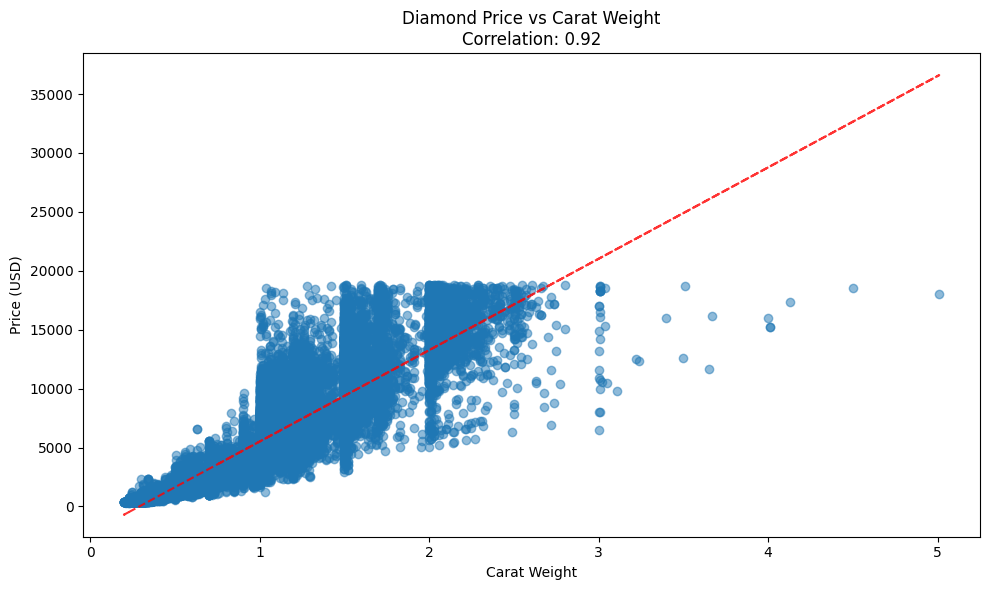

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['carat'], df['price'], alpha=0.5)

correlation = df['carat'].corr(df['price'])

plt.xlabel('Carat Weight')
plt.ylabel('Price (USD)')
plt.title('Diamond Price vs Carat Weight\n' + f'Correlation: {correlation:.2f}')

z = np.polyfit(df['carat'], df['price'], 1)
p = np.poly1d(z)
plt.plot(df['carat'], p(df['carat']), "r--", alpha=0.8)

plt.tight_layout()

plt.show()

This chart shows the correlation between carat weight and price. The red dashed line shows the positive relationship between carat weight and price. The chart shows a strong positive correlation between carat weight and price. As carat weight increases, the price increases. The relationship between carat weight and price appears to be non-linear as the price increases more rapidly with each additional carat weight.

## Question 5: 
(10 pts) Calculate the Pearson Correlation coefficient of carat and price. Explain the results and discuss the strength of the correlation.

In [8]:
correlation = df['carat'].corr(df['price'])
print(f"Pearson correlation coefficient between carat and price: {correlation:.4f}")

Pearson correlation coefficient between carat and price: 0.9216


The Pearson correlation coefficient is 0.9216. This indicates a very strong positive correlation between carat weight and price. Since the Pearson correlation is very close to 1, it shows that the variables are highly rated. The strong positive correlation confirms that carat weight is a primary driver of diamond price.

## Question 6:
(15 pts) Create a histogram (or boxplot) that shows the distribution of prices based on the quality of the cut. Explain the charts and skew.
Note: this question is asking you to show the distribution of diamond prices for each cut. There should be a separate histogram/boxplot for each cut.

In [11]:
import seaborn as sns

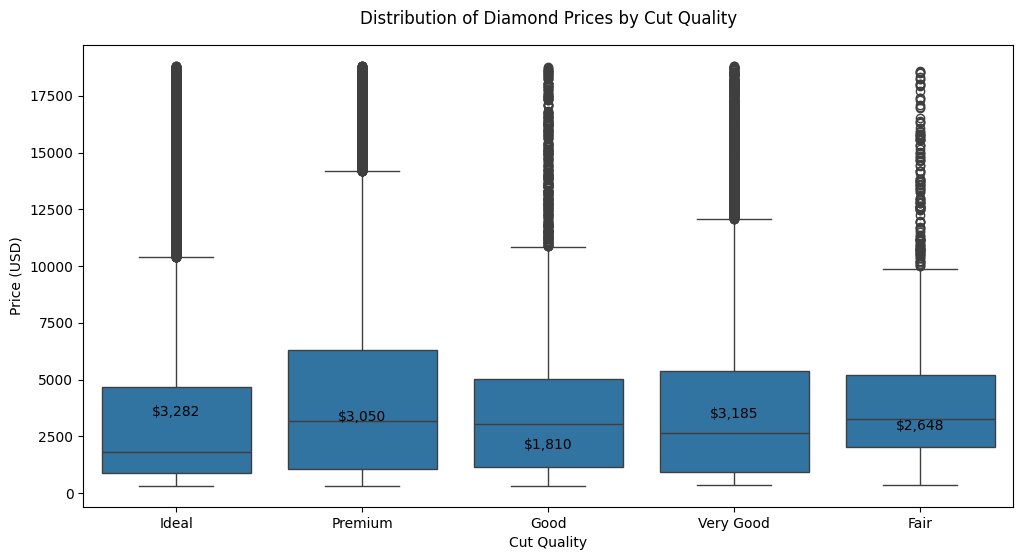

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cut', y='price', data=df)

plt.title('Distribution of Diamond Prices by Cut Quality', fontsize=12, pad=15)
plt.xlabel('Cut Quality', fontsize=10)
plt.ylabel('Price (USD)', fontsize=10)

medians = df.groupby('cut')['price'].median()
for i, cut in enumerate(medians.index):
    plt.text(i, medians[cut], f'${int(medians[cut]):,}', 
             horizontalalignment='center', verticalalignment='bottom')

plt.show()

This histogram shows the distribution of prices based on the cut quality. We can see from this histogram that the cuts display a right skewed distribution of prices. This means there are more diamonds at lower price points than diamonds at higher price points. Higher quality cuts like ideal and premium tend to have higher median prices. There appears to be outliers across all cuts that drag the distribution to the right.

## Question 7:
(10 pts) Using a 2-sample t-test**, determine if there is a statistical difference between the price of diamonds with a cut that is considered:
'Good' vs 'Very Good'
'Premium' vs 'Ideal'
**set alpha to 5% i.e. 0.05.

In [25]:
# Calculate t-statistic and mean prices for two groups
def calculate_ttest(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    
    std1 = np.std(group1, ddof=1)
    std2 = np.std(group2, ddof=1)
    
    n1 = len(group1)
    n2 = len(group2)
    
    se = np.sqrt((std1**2/n1) + (std2**2/n2))
    
    t_stat = (mean1 - mean2) / se
    
    df = (std1**2/n1 + std2**2/n2)**2 / (
        (std1**4/(n1**2*(n1-1)) + std2**4/(n2**2*(n2-1)))
    )
    
    return t_stat, mean1, mean2

# Good vs Very Good
good_prices = df[df['cut'] == 'Good']['price']
very_good_prices = df[df['cut'] == 'Very Good']['price']

t_stat1, good_mean, very_good_mean = calculate_ttest(good_prices, very_good_prices)

print("Test 1: Good vs Very Good")
print(f"t-statistic: {t_stat1:.4f}")
print(f"Mean price (Good): ${good_mean:.2f}")
print(f"Mean price (Very Good): ${very_good_mean:.2f}")
print(f"Difference in means: ${very_good_mean - good_mean:.2f}")
print("\nResult: ", "Statistically significant" if abs(t_stat1) > 1.96 else "Not statistically significant")

# Premium vs Ideal
premium_prices = df[df['cut'] == 'Premium']['price']
ideal_prices = df[df['cut'] == 'Ideal']['price']

t_stat2, premium_mean, ideal_mean = calculate_ttest(premium_prices, ideal_prices)

print("\nTest 2: Premium vs Ideal")
print(f"t-statistic: {t_stat2:.4f}")
print(f"Mean price (Premium): ${premium_mean:.2f}")
print(f"Mean price (Ideal): ${ideal_mean:.2f}")
print(f"Difference in means: ${ideal_mean - premium_mean:.2f}")
print("\nResult: ", "Statistically significant" if abs(t_stat2) > 1.96 else "Not statistically significant")

Test 1: Good vs Very Good
t-statistic: -0.8317
Mean price (Good): $3928.86
Mean price (Very Good): $3981.76
Difference in means: $52.90

Result:  Not statistically significant

Test 2: Premium vs Ideal
t-statistic: 24.9179
Mean price (Premium): $4584.26
Mean price (Ideal): $3457.54
Difference in means: $-1126.72

Result:  Statistically significant


### Good vs Very Good:
We have a t-statistic of -0.8317. For a 2 sample test with an alpha of 5%, the critical value is 1.96. Since the t-statistic is less than 1.96, we fail to reject the null hypothesis. The difference in price is not statistically significant. There is not enough statistical evidence to conclude there's a significant price difference between good and very good cuts. 

### Premium vs Ideal:
We have a t-statistic of 24.9179. For a 2 sample test with an alpha of 5%, the critical value is 1.96. Since the t-statistic is greater than 1.96, we reject the null hypothesis. The difference in price between premium and ideal is statistically significant. There is enough evidence to conclude that there's a significant price difference between premium and ideal cuts.

## Question 8: 
(7 pts) [optional/challenge question] Many statistical test rely on the assumption that data is normally distributed. Indicate which distributions in question 6 were skewed, and research one possible technique* that can be used to handle skewed data. Then perform the following:
- Demonstrate the selected technique to correct the skewed data.
- Repeat the analysis in question 6 using the corrected data and explain the difference in the distribution with the previous results.
- Repeat the statistical tests in question 7 using the corrected data. Are there any changes in the statistical significance? Explain the results.

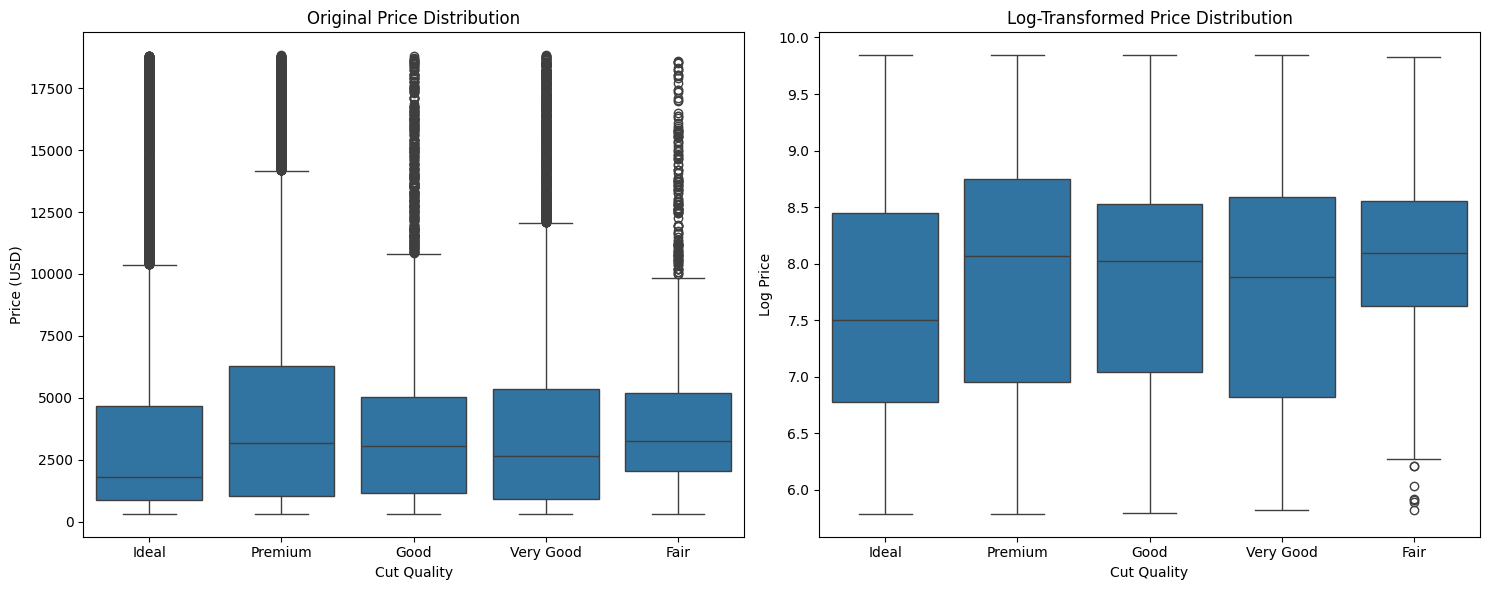

In [ ]:
df['log_price'] = np.log(df['price'])

plt.figure(figsize=(15, 6))

# Original price distribution
plt.subplot(1, 2, 1)
sns.boxplot(x='cut', y='price', data=df)
plt.title('Original Price Distribution')
plt.xlabel('Cut Quality')
plt.ylabel('Price (USD)')

# Log-transformed price distribution
plt.subplot(1, 2, 2)
sns.boxplot(x='cut', y='log_price', data=df)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Cut Quality')
plt.ylabel('Log Price')

plt.tight_layout()
plt.show()

From question 6, all cuts were skewed right. Log transformation is especially effective for right-skewed data. Log transformation is when you take the logarithm of each value in the dataset. This helps with right-skewed data as the bigger values will be more affected by the log than smaller values. Bigger values like outliers will be more compressed than smaller values if we use log transformation. As we can see from the original price distribution and the log-transformed price distribution, the log-transformed price distribution is more symmetrical, has more balanced whiskers, and less outliers. 

In [29]:
# Good vs Very Good
good_prices = df[df['cut'] == 'Good']['log_price']
very_good_prices = df[df['cut'] == 'Very Good']['log_price']

t_stat1, good_mean, very_good_mean = calculate_ttest(good_prices, very_good_prices)

print("\nTest 1 (Log-transformed): Good vs Very Good")
print(f"t-statistic: {t_stat1:.4f}")
print(f"Mean log price (Good): {good_mean:.4f}")
print(f"Mean log price (Very Good): {very_good_mean:.4f}")
print("Result: ", "Statistically significant" if abs(t_stat1) > 1.96 else "Not statistically significant")

# Premium vs Ideal
premium_prices = df[df['cut'] == 'Premium']['log_price']
ideal_prices = df[df['cut'] == 'Ideal']['log_price']

t_stat2, premium_mean, ideal_mean = calculate_ttest(premium_prices, ideal_prices)

print("\nTest 2 (Log-transformed): Premium vs Ideal")
print(f"t-statistic: {t_stat2:.4f}")
print(f"Mean log price (Premium): {premium_mean:.4f}")
print(f"Mean log price (Ideal): {ideal_mean:.4f}")
print("Result: ", "Statistically significant" if abs(t_stat2) > 1.96 else "Not statistically significant")


Test 1 (Log-transformed): Good vs Very Good
t-statistic: 2.6129
Mean log price (Good): 7.8428
Mean log price (Very Good): 7.7987
Result:  Statistically significant

Test 2 (Log-transformed): Premium vs Ideal
t-statistic: 28.1133
Mean log price (Premium): 7.9508
Mean log price (Ideal): 7.6395
Result:  Statistically significant


### Good vs Very Good
The test results for good vs very good cuts have changed. Previously, without the log-transformed dataset, we concluded that the difference in price was not statistically significant. However, after log-transforming the dataset, the difference in price between good and very good cuts is not statisically significant. With the new log-transformed dataset, the t-statistic for good vs very good cuts is 2.6129, which is greater than the critical value of 1.96 for 2 sample tests with an alpha of 5%. Since the t-statistic is greater than the critical value, we can reject the null hypothesis and conclude that the results are statistically significant. There is enough evidence to conclude that there's a significant price difference between good and very good cuts. Removing the right-skewedness helped uncover some notable differences that were previously hidden.

### Premium vs Ideal
The results for premium and ideal cuts stay the same, as their result is still statisically significant. 

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
